In [ ]:
import os
import itertools
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debangighosh
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:08<00:00, 18.6MB/s]


In [ ]:
Training = './brain-tumor-mri-dataset/Training'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

tr_dir = os.listdir(Training)

In [ ]:
# Get paths and Labels of classes and images in Training Directory

for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [ ]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)

In [ ]:
# Get Paths of testing directory

Testing = './brain-tumor-mri-dataset/Testing'


# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [ ]:
# Get paths and Labels of classes and images in Training Directory

for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [ ]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

In [ ]:
Tr_data.shape

(5712, 2)

In [ ]:
Tr_data.head()

,Paths,Labels
0,./brain-tumor-mri-dataset/Training/pituitary/T...,pituitary
1,./brain-tumor-mri-dataset/Training/pituitary/T...,pituitary
2,./brain-tumor-mri-dataset/Training/pituitary/T...,pituitary
3,./brain-tumor-mri-dataset/Training/pituitary/T...,pituitary
4,./brain-tumor-mri-dataset/Training/pituitary/T...,pituitary


In [ ]:
Ts_data.shape

(1311, 2)

In [ ]:
Ts_data.head()

,Paths,Labels
0,./brain-tumor-mri-dataset/Testing/pituitary/Te...,pituitary
1,./brain-tumor-mri-dataset/Testing/pituitary/Te...,pituitary
2,./brain-tumor-mri-dataset/Testing/pituitary/Te...,pituitary
3,./brain-tumor-mri-dataset/Testing/pituitary/Te...,pituitary
4,./brain-tumor-mri-dataset/Testing/pituitary/Te...,pituitary


In [ ]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


In [ ]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()

In [ ]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.


In [ ]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


In [ ]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


In [ ]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
imgs, labels = next(Train)

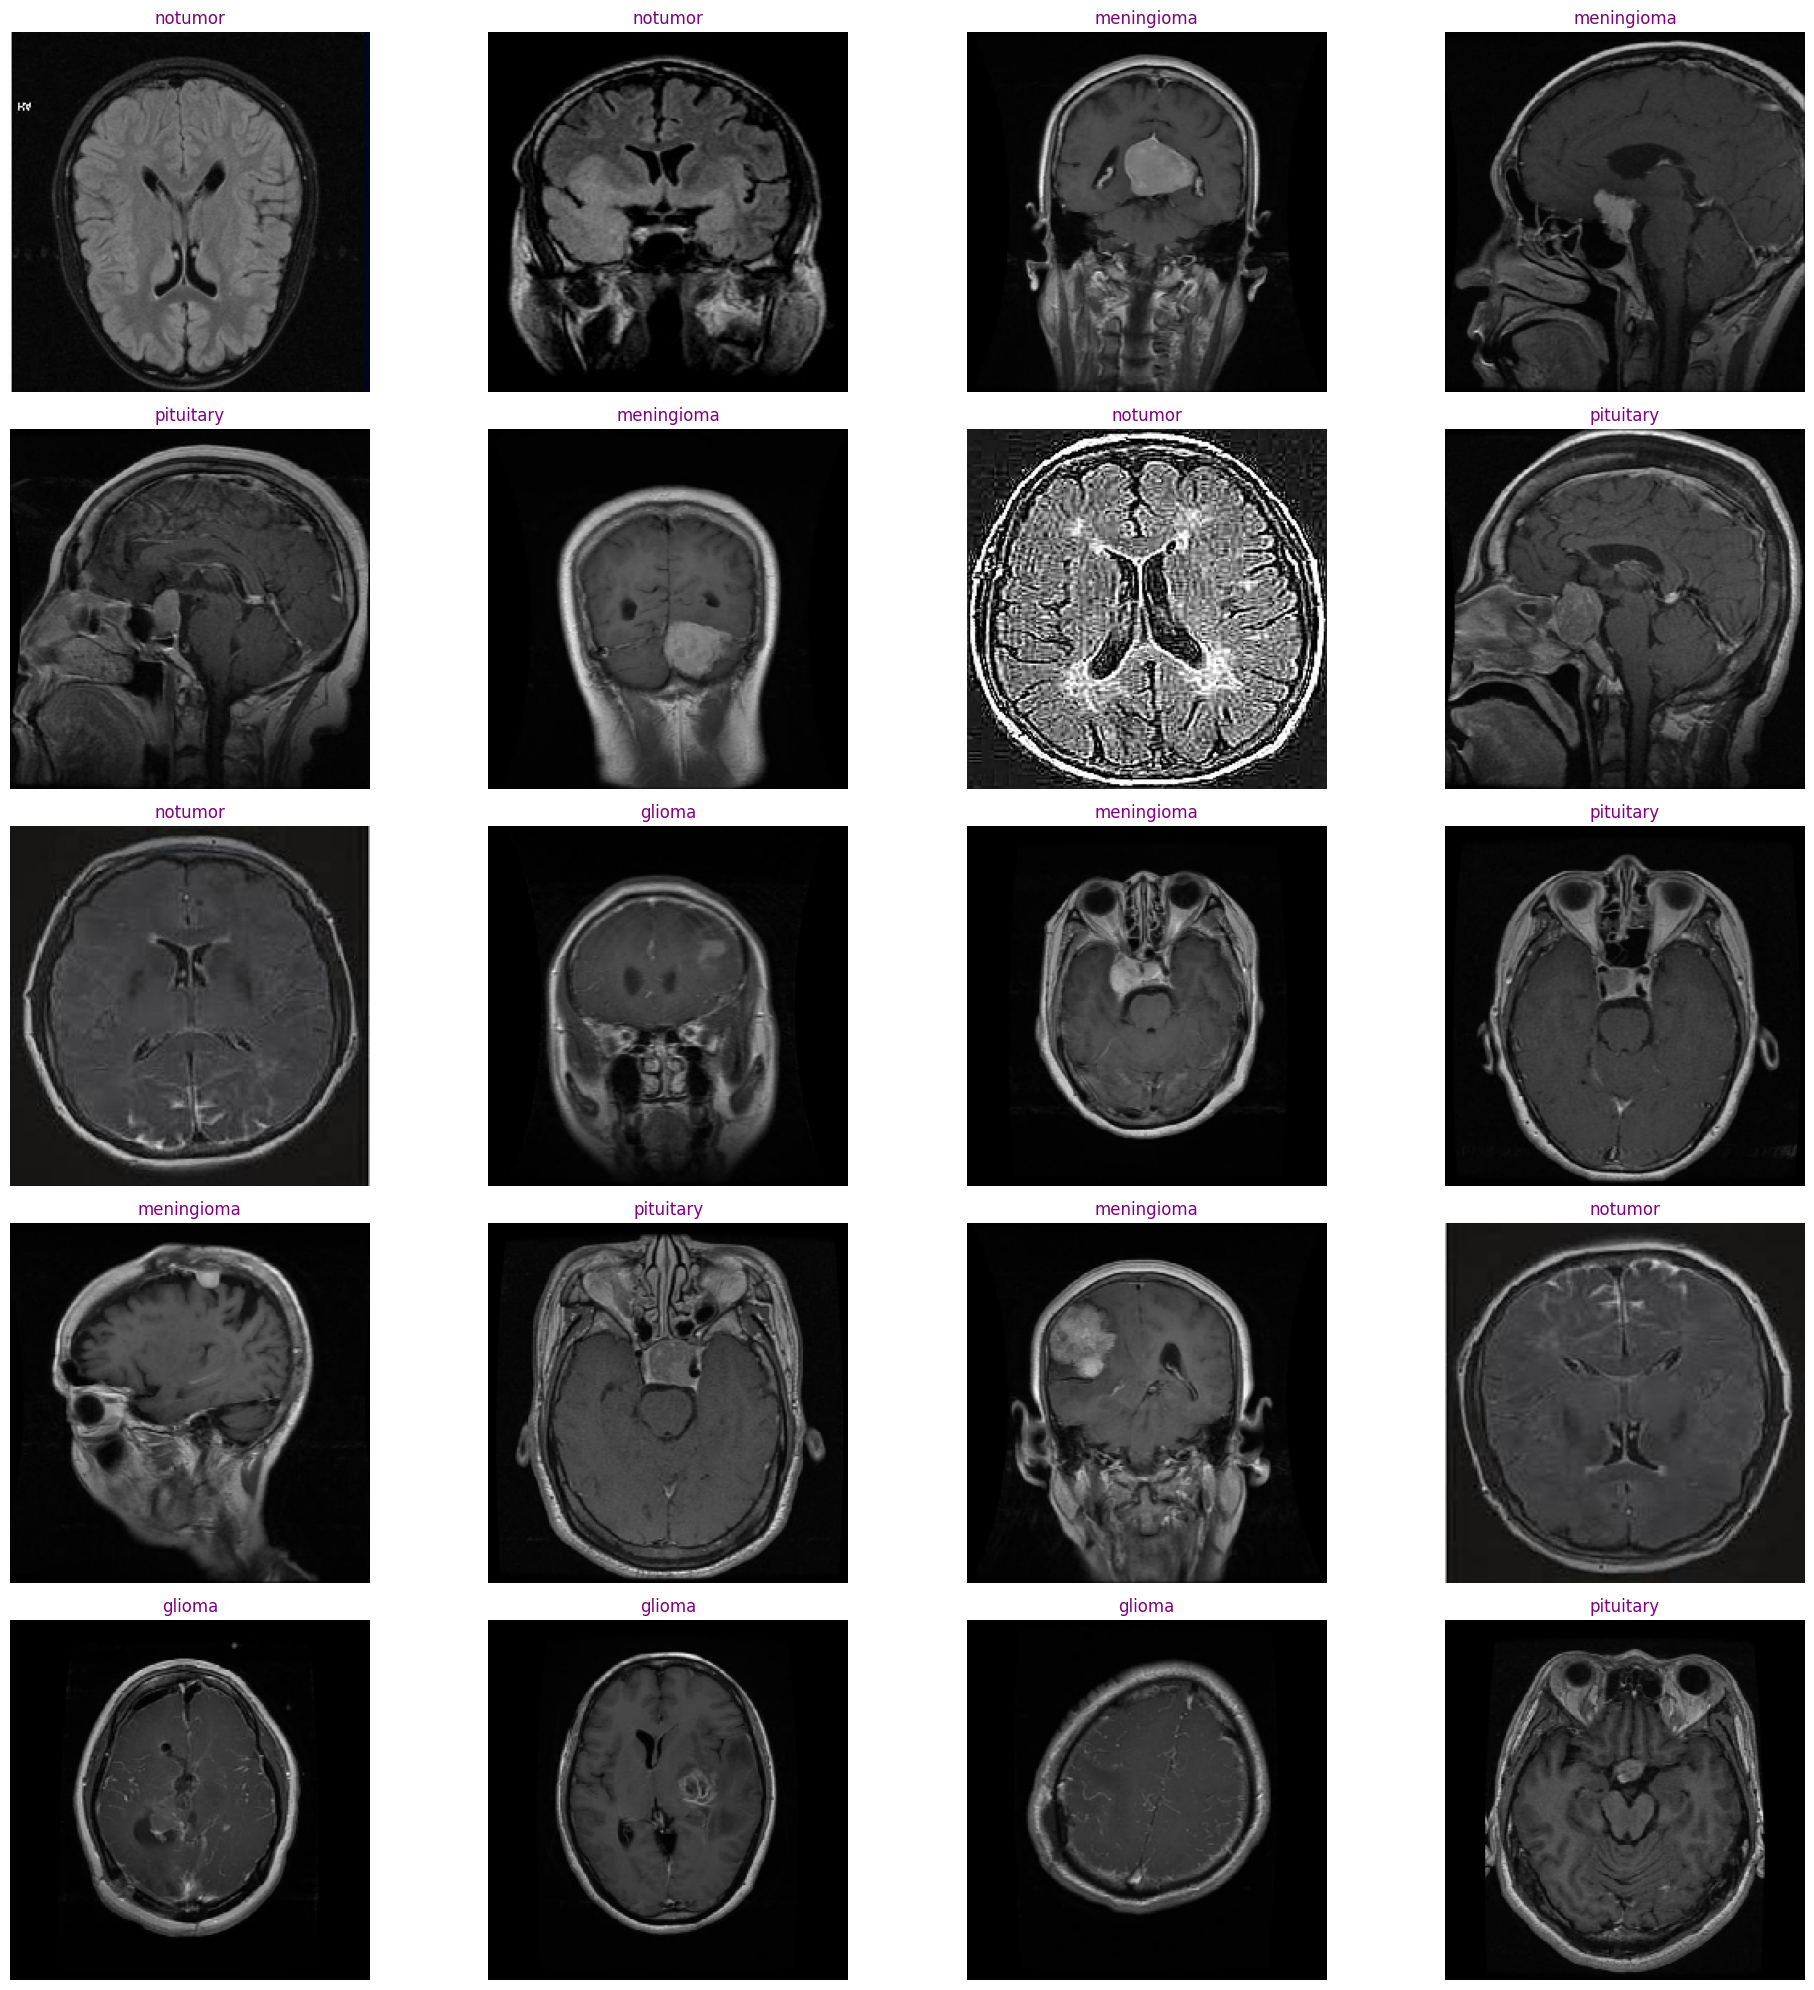

In [ ]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [ ]:
Train

In [ ]:
# Define number of classes
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

In [ ]:
def custom_activation_functionsigmoid(x):
    t=1/1+(tf.exp(-x))
    #dt=1-t**2
    return t

In [ ]:
def custom_activation_functionrelu(x):
    t = tf.maximum(0.0, x)  # Specify 0.0 to ensure consistent data type
    return t

In [ ]:
def custom_activation_functiontanh(x):
    t=(tf.exp(x)-tf.exp(-x))/(tf.exp(x)+tf.exp(-x))
    #dt=1-t**2
    return t

In [ ]:
def custom_activation_function_elu(x, alpha=1.0):
    return tf.where(x >= 0, x, alpha * (tf.exp(x) - 1))

In [ ]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
CNNtanh = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'tanh', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'tanh'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'tanh'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'tanh'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
CNNsigmoid = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'sigmoid', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'sigmoid'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'sigmoid'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'sigmoid'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'sigmoid'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'sigmoid'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
CNNrelu = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'relu'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
# Model Compilation
CNNrelu.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Model Compilation
CNNtanh.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Model Compilation
CNNsigmoid.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Model Compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Get summary
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 256)     295168    
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 256)     590080    
                                                      

In [ ]:
CNNrelu.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 conv2d_48 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 conv2d_49 (Conv2D)          (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 112, 112, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 112, 112, 64)      73792     
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [ ]:
Train


In [ ]:
epochs = 10

historysigmoid = CNNsigmoid.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/10
286/286 [==============================] - 133s 455ms/step - loss: 1.8340 - accuracy: 0.2556 - val_loss: 1.3828 - val_accuracy: 0.3130
Epoch 2/10
286/286 [==============================] - 129s 450ms/step - loss: 1.3864 - accuracy: 0.2708 - val_loss: 1.3808 - val_accuracy: 0.3130
Epoch 3/10
286/286 [==============================] - 129s 451ms/step - loss: 1.3872 - accuracy: 0.2658 - val_loss: 1.3943 - val_accuracy: 0.3130
Epoch 4/10
286/286 [==============================] - 129s 450ms/step - loss: 1.3866 - accuracy: 0.2780 - val_loss: 1.3881 - val_accuracy: 0.2458
Epoch 5/10
286/286 [==============================] - 133s 465ms/step - loss: 1.3868 - accuracy: 0.2736 - val_loss: 1.3794 - val_accuracy: 0.3130
Epoch 6/10
286/286 [==============================] - 129s 450ms/step - loss: 1.3868 - accuracy: 0.2679 - val_loss: 1.3869 - val_accuracy: 0.2336
Epoch 7/10
286/286 [==============================] - 129s 452ms/step - loss: 1.3886 - accuracy: 0.2675 - val_loss: 1.3797 -

In [ ]:
epochs = 15

historytanh = CNNtanh.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
286/286 [==============================] - 138s 477ms/step - loss: 2.5938 - accuracy: 0.2612 - val_loss: 1.3842 - val_accuracy: 0.2336
Epoch 2/15
286/286 [==============================] - 128s 448ms/step - loss: 1.3890 - accuracy: 0.2722 - val_loss: 1.3987 - val_accuracy: 0.2076
Epoch 3/15
286/286 [==============================] - 133s 464ms/step - loss: 1.3896 - accuracy: 0.2684 - val_loss: 1.3820 - val_accuracy: 0.3130
Epoch 4/15
286/286 [==============================] - 128s 449ms/step - loss: 1.3910 - accuracy: 0.2679 - val_loss: 1.3853 - val_accuracy: 0.2458
Epoch 5/15
286/286 [==============================] - 129s 450ms/step - loss: 1.3936 - accuracy: 0.2563 - val_loss: 1.3826 - val_accuracy: 0.3130
Epoch 6/15
286/286 [==============================] - 128s 448ms/step - loss: 1.3913 - accuracy: 0.2623 - val_loss: 1.3867 - val_accuracy: 0.3130
Epoch 7/15
286/286 [==============================] - 128s 449ms/step - loss: 1.3927 - accuracy: 0.2621 - val_loss: 1.3775 -

In [ ]:
epochs = 15

historyrelu = CNNrelu.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
286/286 [==============================] - 203s 463ms/step - loss: 13.6709 - accuracy: 0.7020 - val_loss: 0.5747 - val_accuracy: 0.7756
Epoch 2/15
286/286 [==============================] - 125s 436ms/step - loss: 0.3051 - accuracy: 0.8964 - val_loss: 0.2702 - val_accuracy: 0.8962
Epoch 3/15
286/286 [==============================] - 126s 439ms/step - loss: 0.1645 - accuracy: 0.9447 - val_loss: 0.2137 - val_accuracy: 0.9298
Epoch 4/15
286/286 [==============================] - 125s 437ms/step - loss: 0.0869 - accuracy: 0.9723 - val_loss: 0.2745 - val_accuracy: 0.9328
Epoch 5/15
286/286 [==============================] - 125s 438ms/step - loss: 0.0602 - accuracy: 0.9806 - val_loss: 0.1729 - val_accuracy: 0.9542
Epoch 6/15
286/286 [==============================] - 125s 437ms/step - loss: 0.0291 - accuracy: 0.9928 - val_loss: 0.2670 - val_accuracy: 0.9466
Epoch 7/15
286/286 [==============================] - 125s 437ms/step - loss: 0.0295 - accuracy: 0.9895 - val_loss: 0.3646 

In [ ]:
epochs = 15
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history= CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
286/286 [==============================] - 234s 808ms/step - loss: 0.8139 - accuracy: 0.6921 - val_loss: 0.5117 - val_accuracy: 0.8092
Epoch 2/15
286/286 [==============================] - 231s 807ms/step - loss: 0.3636 - accuracy: 0.8676 - val_loss: 0.5755 - val_accuracy: 0.8275
Epoch 3/15
286/286 [==============================] - 230s 803ms/step - loss: 0.2980 - accuracy: 0.8932 - val_loss: 0.4667 - val_accuracy: 0.8382
Epoch 4/15
286/286 [==============================] - 230s 805ms/step - loss: 0.2454 - accuracy: 0.9116 - val_loss: 0.3451 - val_accuracy: 0.8656
Epoch 5/15
286/286 [==============================] - 230s 804ms/step - loss: 0.2064 - accuracy: 0.9242 - val_loss: 0.3609 - val_accuracy: 0.8901
Epoch 6/15
286/286 [==============================] - 229s 802ms/step - loss: 0.1526 - accuracy: 0.9468 - val_loss: 0.2322 - val_accuracy: 0.9023
Epoch 7/15
286/286 [==============================] - 231s 806ms/step - loss: 0.1381 - accuracy: 0.9503 - val_loss: 0.2559 -

In [ ]:
# accuracy and loss of Train

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'


In [ ]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.6920518279075623, 0.8676470518112183, 0.893207311630249, 0.9115896224975586, 0.9241946935653687, 0.9467787146568298, 0.9502801299095154, 0.9609593749046326, 0.968837559223175, 0.9765406250953674, 0.9754902124404907, 0.9819678068161011, 0.9765406250953674, 0.9877451062202454, 0.9900209903717041]


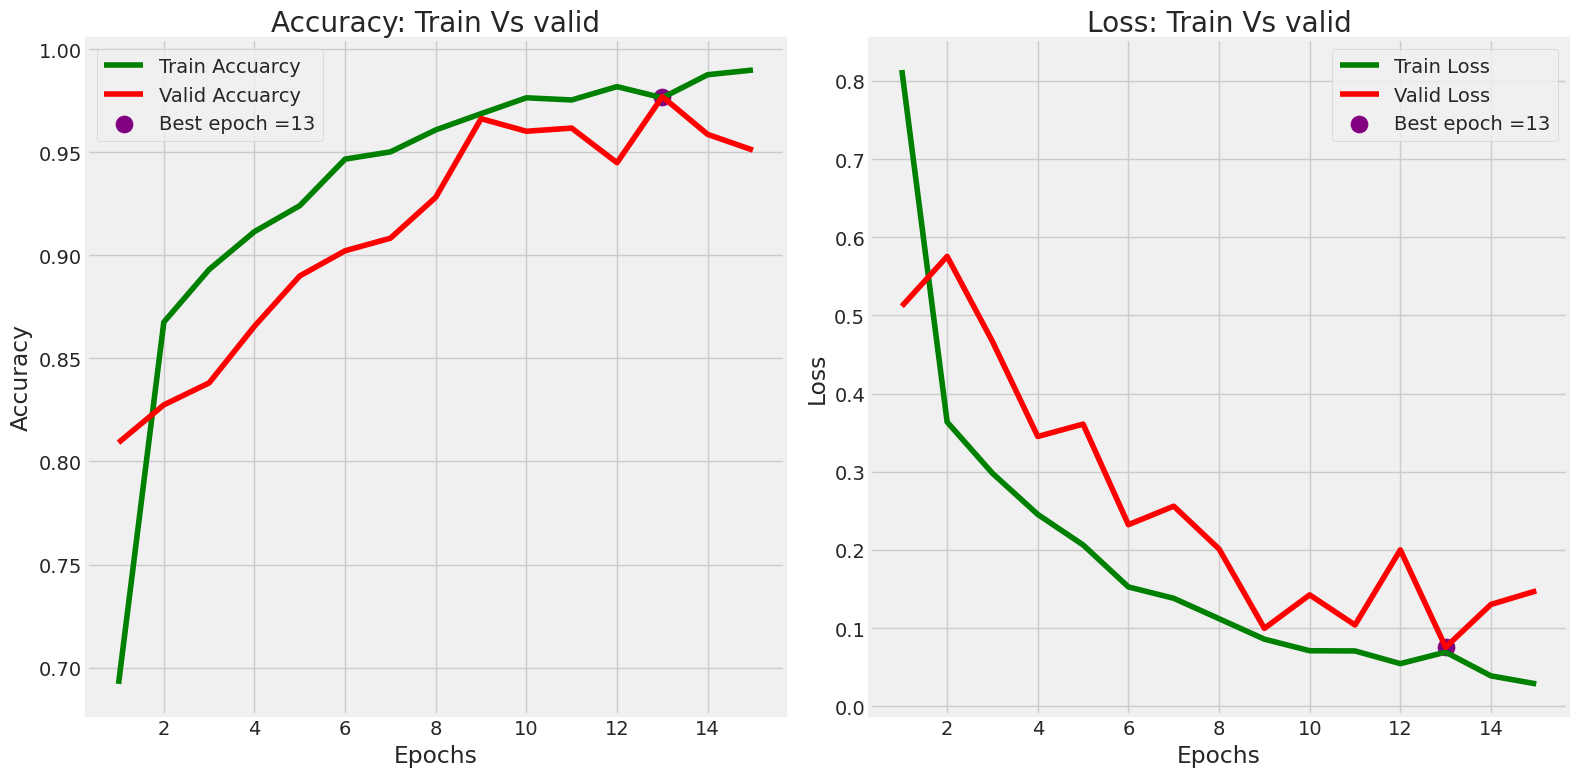

In [ ]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Define Vars
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9754902124404907 
      Loss:  0.06309542804956436 
________________________
Valid Scores : 
    accuracy: 0.9511450529098511 
      Loss:  0.14760318398475647 
________________________
Test Scores : 
    accuracy: 0.9542682766914368 
      Loss:  0.17817021906375885 
________________________


In [ ]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Check
print(predictions)
print(y_pred)

[[1.1233802e-07 6.2182357e-06 9.9999368e-01 2.5596144e-08]
 [9.9966526e-01 4.3972035e-05 2.7847398e-04 1.2306303e-05]
 [1.5499003e-12 9.9999106e-01 8.4180338e-06 4.8881026e-07]
 ...
 [2.8325603e-10 9.9967468e-01 5.9914114e-09 3.2535644e-04]
 [8.0144822e-08 4.0696050e-05 7.7521427e-11 9.9995923e-01]
 [9.8014027e-01 1.9459086e-02 7.3279771e-05 3.2737179e-04]]
[2 0 1 3 2 0 0 1 2 1 1 2 0 0 0 0 2 1 1 2 1 1 3 3 1 2 3 0 3 2 3 3 2 2 0 3 1
 0 1 3 3 2 2 1 0 0 0 2 2 1 3 2 2 0 3 0 2 1 3 2 0 1 2 2 2 1 0 2 1 2 3 1 3 1
 1 3 2 2 1 0 0 2 2 2 0 3 0 3 0 2 1 3 0 3 0 0 0 1 2 2 3 2 2 1 0 2 3 0 2 2 0
 0 1 3 2 1 2 0 2 0 1 2 0 2 3 2 1 3 3 2 3 0 0 2 0 3 1 0 0 1 2 2 3 0 3 3 0 1
 0 0 3 3 0 2 2 3 2 2 2 3 1 3 2 3 0 0 1 1 3 3 3 3 0 3 3 2 3 0 1 0 1 3 3 3 0
 1 3 3 2 3 1 3 0 3 0 2 3 3 3 0 3 2 1 2 1 0 3 2 3 3 3 0 3 2 2 3 2 2 2 0 3 0
 2 2 0 2 3 3 3 1 1 0 1 2 1 2 0 3 2 2 1 2 2 3 3 0 2 0 2 2 1 2 0 0 0 0 1 3 2
 3 2 3 0 1 0 1 0 2 1 1 3 3 2 0 1 2 2 2 1 1 0 0 0 2 0 1 0 3 1 1 2 3 0 0 2 3
 1 2 0 1 3 2 0 2 1 2 3 1 2 1 1 2 0 1 2 2

In [ ]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[138,   1,   0,   0],
       [ 11, 130,   1,  11],
       [  1,   0, 199,   0],
       [  4,   1,   0, 159]])

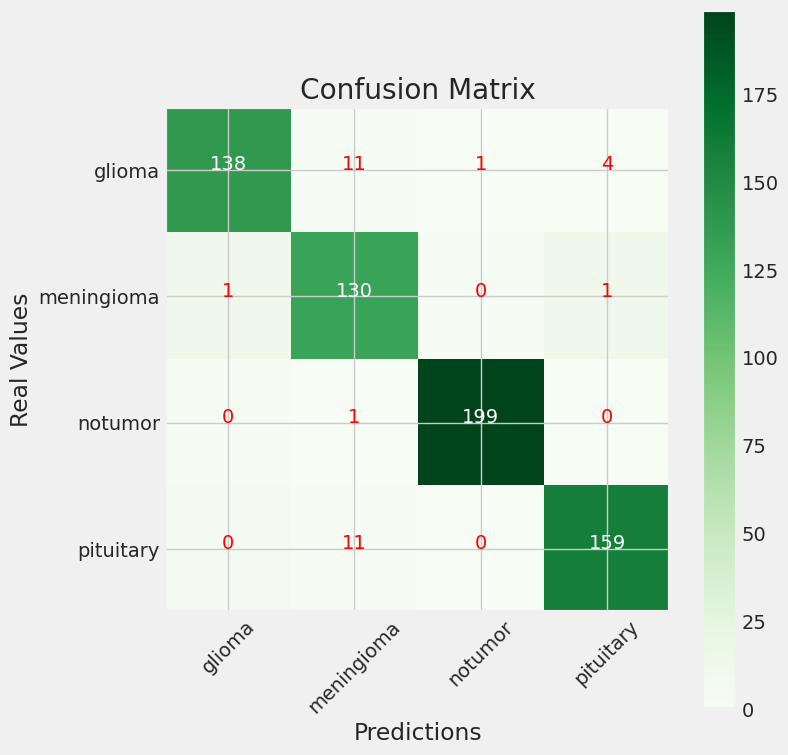

In [ ]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [ ]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.90      0.99      0.94       139
  meningioma       0.98      0.85      0.91       153
     notumor       0.99      0.99      0.99       200
   pituitary       0.94      0.97      0.95       164

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.96      0.95      0.95       656



In [ ]:
CNN.save('CNN.h5')

In [ ]:
files = os.listdir('./brain-tumor-mri-dataset')
print(files)

['Training', 'Testing']


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)

Current Working Directory: /content


In [ ]:
CNN = tf.keras.models.load_model('CNN.h5', compile = False)
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# image path
path = './brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0001.jpg'

# open image
img = Image.open(path)

# Preprocess
img1 = img.resize((224, 224))
iArray = tf.keras.preprocessing.image.img_to_array(img1)
iArray = tf.expand_dims(iArray, 0)

#Predictions ratio for each class
p = CNN.predict(iArray)

#Get score:
score = tf.nn.softmax(p[0])
print('\nPredictions of given image:  \n\n', score)


# Get class whose max ratio
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(f'-------------------------\nClass whose max ratio: \n\n{cl_labels[np.argmax(p)]}')

#
print(f"{cl_labels[np.argmax(p)]}")

1/1 [==============================] - 1s 1s/step

Predictions of given image:  

 tf.Tensor([0.47526565 0.17489396 0.17490765 0.17493275], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

glioma
glioma
